In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [20]:
digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2, random_state=42)

In [22]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [23]:
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        return self.model(x)

In [24]:
model = DNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [25]:
for epoch in range(20):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

Epoch 1, Loss: 2.5542
Epoch 2, Loss: 2.3223
Epoch 3, Loss: 2.1604
Epoch 4, Loss: 2.0370
Epoch 5, Loss: 1.9291
Epoch 6, Loss: 1.8250
Epoch 7, Loss: 1.7215
Epoch 8, Loss: 1.6178
Epoch 9, Loss: 1.5156
Epoch 10, Loss: 1.4155
Epoch 11, Loss: 1.3176
Epoch 12, Loss: 1.2222
Epoch 13, Loss: 1.1295
Epoch 14, Loss: 1.0395
Epoch 15, Loss: 0.9521
Epoch 16, Loss: 0.8676
Epoch 17, Loss: 0.7875
Epoch 18, Loss: 0.7138
Epoch 19, Loss: 0.6484
Epoch 20, Loss: 0.5911


In [26]:
model.eval()
with torch.no_grad():
    preds = model(X_test_tensor).argmax(dim=1)
    acc = metrics.accuracy_score(y_test_tensor, preds)
    print(f"Test Accuracy: {acc:.4f}")

Test Accuracy: 0.8944


<ipython-input-27-bf4dc4a0e6e9>:3: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  plt.title(f"Prediction: {model(torch.tensor([X_test[idx]], dtype=torch.float32)).argmax(dim=1).item()}")


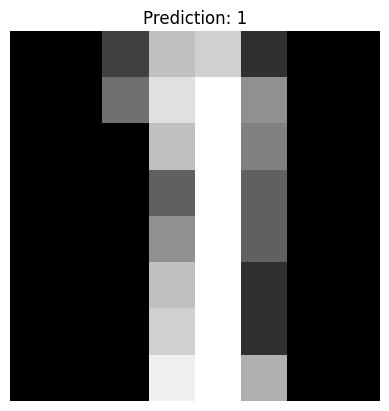

In [27]:
idx = 10
plt.imshow(X_test[idx].reshape(8, 8), cmap='gray')
plt.title(f"Prediction: {model(torch.tensor([X_test[idx]], dtype=torch.float32)).argmax(dim=1).item()}")
plt.axis('off')
plt.show()